https://www.geeksforgeeks.org/

https://he.quora.com/

https://stackoverflow.com/

These 3 sites helped me throghout this project and previous ones, I had many questions, from how to start and why use certain things and not others. stackoverflow for me is the most helpfull site, I'd like to mension google as a search engine,and practicum team and site for guidance and feedbacks.

https://drive.google.com/file/d/1dYnW9PPDK3Y4Af_TcwGGpkvIHEfFKJa_/view?usp=sharing

https://public.tableau.com/views/LastShop/Dashboard?:language=en-US&:display_count=n&:origin=viz_share_link

The goals of the study is to determine how to increase sales with customers in the loyalty program without losing them. I will see if there is a possibility that it will increase both the frequency of the purchases and the purchases size.

# Introduction
In this project I will analyze and visualize my data in order to preduce insights
## Outlines
1. I go over the data file and learn it.
2. Understand the groups, time of the test & the integrity of my actions throughout the whole procedure.
3. Make conclusions based on it.
### Tasks
I will go over the steps and see any problames with the data and its outcomes.

### Description of Data Source
The data is built from 2 data sets with similarities and diffrences.

## Table of Contents:
1. Unfolding of the data, preparing the data for analysis, studying and checking the data.
2. Identify the relationship between 'price per one', 'quantity'  and 'purchase date' and 'loyalty program' to the probability of leaving the 'loyalty program'.
3. Understand what is the 'comfort zone' for customers in the loyalty program and come up with strong marker that 'price per one' and 'quantity' can increase while the costumer is in the 'loyalty program'' with no intention to leave.
4. Conclusions and recommendations.

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
import seaborn as sn

### 1. Unfolding of the data, preparing the data for analysis, studying and checking the data.

In [3]:
retail=pd.read_csv('retail_dataset_us.csv')
product=pd.read_csv('product_codes_us.csv',sep=';')
retail.columns= retail.columns.str.lower()
product.columns= product.columns.str.lower()
print(retail)

       purchaseid item_id  quantity         purchasedate  customerid  \
0          538280   21873        11  2016-12-10 12:50:00     18427.0   
1          538862   22195         0  2016-12-14 14:11:00     22389.0   
2          538855   21239         7  2016-12-14 13:50:00     22182.0   
3          543543   22271         0  2017-02-09 15:33:00     23522.0   
4          543812   79321         0  2017-02-13 14:40:00     23151.0   
...           ...     ...       ...                  ...         ...   
105330     538566   21826         1  2016-12-13 11:21:00         NaN   
105331     540247   21742         0  2017-01-05 15:56:00     21143.0   
105332     538068   85048         1  2016-12-09 14:05:00     23657.0   
105333     538207   22818        11  2016-12-10 11:33:00     18427.0   
105334     543977   22384         9  2017-02-14 15:35:00     21294.0   

        loyalty_program   shopid  
0                     0   Shop 3  
1                     1   Shop 2  
2                     1   Shop

In [4]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_id          105335 non-null  object 
 2   quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   customerid       69125 non-null   float64
 5   loyalty_program  105335 non-null  int64  
 6   shopid           105335 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ MB


Some data types should be changed.

In [5]:
retail['customerid'] = retail['customerid'].astype('object')
retail['purchasedate'] = retail['purchasedate'].astype('datetime64[ns]')

In [6]:
retail.describe(include='all',datetime_is_numeric=True)

,purchaseid,item_id,quantity,purchasedate,customerid,loyalty_program,shopid
count,105335,105335,105335.000000,105335,69125.0,105335.000000,105335
unique,4894,3159,NaN,NaN,1749.0,NaN,31
top,537434,85123A,NaN,NaN,18427.0,NaN,Shop 0
freq,675,565,NaN,NaN,796.0,NaN,38389
mean,NaN,NaN,7.821218,2017-01-09 18:18:42.962927872,NaN,0.226345,NaN
min,NaN,NaN,-74216.000000,2016-12-01 08:26:00,NaN,0.000000,NaN
25%,NaN,NaN,0.000000,2016-12-12 13:32:00,NaN,0.000000,NaN
50%,NaN,NaN,2.000000,2017-01-11 12:41:00,NaN,0.000000,NaN
75%,NaN,NaN,7.000000,2017-02-01 15:12:00,NaN,0.000000,NaN
max,NaN,NaN,74214.000000,2017-02-28 17:04:00,NaN,1.000000,NaN


In [7]:
for i in retail[retail.duplicated()].columns:
    print(i,':', retail[retail.duplicated()][i].nunique())

purchaseid : 374
item_id : 601
quantity : 19
purchasedate : 370
customerid : 272
loyalty_program : 2
shopid : 31


Not many duplicates, droping them should change all that much.

In [8]:
retail.drop_duplicates(keep=False, inplace=True)

In [9]:
for i in retail[retail.duplicated()].columns:
    print(i,':', retail[retail.duplicated()][i].nunique())

purchaseid : 0
item_id : 0
quantity : 0
purchasedate : 0
customerid : 0
loyalty_program : 0
shopid : 0


In [10]:
print(product)

         productid  price_per_one
0            10002           0.85
1            10080           0.85
2            10120           0.21
3           10123C           0.65
4           10124A           0.42
...            ...            ...
3154  gift_0001_20          16.67
3155  gift_0001_30          25.00
3156  gift_0001_40          34.04
3157  gift_0001_50          42.55
3158             m           2.55

[3159 rows x 2 columns]


In [11]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productid      3159 non-null   object 
 1   price_per_one  3159 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


Simple dataframe, conected to the other via 'productid' column.

In [12]:
product.describe(include='all')

,productid,price_per_one
count,3159,3159.000000
unique,3159,NaN
top,84796A,NaN
freq,1,NaN
mean,NaN,2.954495
std,NaN,7.213808
min,NaN,0.000000
25%,NaN,0.650000
50%,NaN,1.450000
75%,NaN,3.290000


In [13]:
for i in product[product.duplicated()].columns:
    print(i,':', product[product.duplicated()][i].nunique())

productid : 0
price_per_one : 0


In [14]:
product.rename(columns={"productid": "item_id"}, inplace=True)

### 2. Preparing the data for analysis.

In [15]:
shop = pd.merge(retail, product, how='left', on='item_id')

In [16]:
shop.quantity.max()

74214

outliner, should be droped

In [17]:
max_index = shop['quantity'].idxmax()
shop = shop.drop(index=max_index)
shop.quantity.max()

5567

still high but reasonable.

In [18]:
shop.isnull().sum().sum()

36107

In [19]:
shop = shop.replace(np.nan,'',regex=True)

In [20]:
customer_dates = shop.groupby('customerid')['purchasedate'].agg(['min', 'max'])
shop['loyalty_duration'] = (customer_dates['max'] - customer_dates['min']).dt.days
shop = shop.dropna(subset=['loyalty_duration'])

Will help me understand if there is any peculiarities with dropping from the loyalty program

In [21]:
shop['total_price']= shop.quantity * shop.price_per_one

self explanatory 

In [22]:
shop = shop[shop['price_per_one'] != 0]
shop = shop[shop['quantity'] != 0]
shop

,purchaseid,item_id,quantity,purchasedate,customerid,loyalty_program,shopid,price_per_one,loyalty_duration,total_price
18025,536412,85049E,11,2016-12-01 11:49:00,23599.0,1,Shop 10,1.25,0.0,13.75
18026,537640,21864,9,2016-12-07 15:31:00,,0,Shop 0,1.69,49.0,15.21
18027,539453,22757,3,2016-12-17 17:08:00,,0,Shop 0,1.06,39.0,3.18
18029,543981,22332,7,2017-02-15 08:18:00,21037.0,0,Shop 30,1.45,0.0,10.15
18038,544156,21380,5,2017-02-16 12:33:00,18031.0,0,Shop 11,2.95,26.0,14.75
...,...,...,...,...,...,...,...,...,...,...
23924,537434,22593,6,2016-12-06 16:57:00,,0,Shop 0,0.72,49.0,4.32
23935,541570,21928,99,2017-01-19 12:34:00,20325.0,0,Shop 30,1.65,0.0,163.35
23936,542729,22556,11,2017-01-31 15:17:00,20873.0,0,Shop 16,1.45,5.0,15.95
23939,C536807,22778,-2,2016-12-02 16:45:00,21513.0,0,Shop 18,3.39,35.0,-6.78


In [23]:
shop_negatives = (shop['quantity'] < 0).sum()
shop_negatives

27

In [24]:
shop = shop.sort_values(by='quantity', ascending=False)
shop = shop.drop(index=shop[shop['quantity'] < 0].index)
shop['quantity'].tail()

18680    1
18151    1
22769    1
21484    1
18150    1
Name: quantity, dtype: int64

In [25]:
shop.columns

Index(['purchaseid', 'item_id', 'quantity', 'purchasedate', 'customerid',
       'loyalty_program', 'shopid', 'price_per_one', 'loyalty_duration',
       'total_price'],
      dtype='object')

### 2. Identify the relationship between 'price per one', 'quantity'  and 'purchase date' and 'loyalty program' to the probability of leaving the 'loyalty program'.

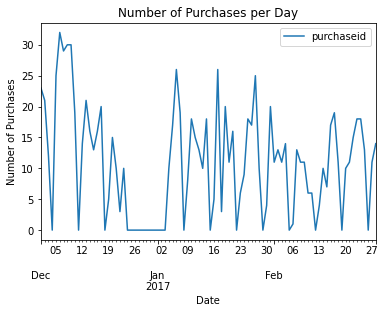

In [26]:
shop.set_index('purchasedate', inplace=True)
shop_purchase_counts = shop.resample('D').count()['purchaseid']
shop_purchase_counts.plot(legend=True)
plt.title('Number of Purchases per Day')
plt.xlabel('Date')
plt.ylabel('Number of Purchases')
plt.show()

Perhaps there was a holiday in that time of 26.12 - 2.1 Chrismas if im not mistaken, more shoping before it. saturdays and sundays are as usual.

In [27]:
shop = shop.reset_index()

In [28]:
shop.columns

Index(['purchasedate', 'purchaseid', 'item_id', 'quantity', 'customerid',
       'loyalty_program', 'shopid', 'price_per_one', 'loyalty_duration',
       'total_price'],
      dtype='object')

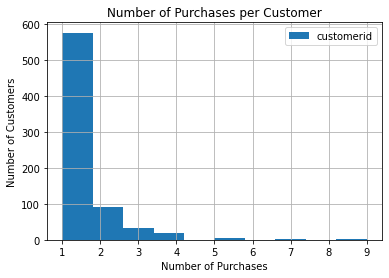

In [29]:
shop_customer_purchases = shop.groupby('purchaseid').count()['customerid']
shop_customer_purchases.hist(bins=10,legend=True)
plt.title('Number of Purchases per Customer')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()

most costumers at that place bought only once, the rest twice and droping quit sharply (1-4 the majority)

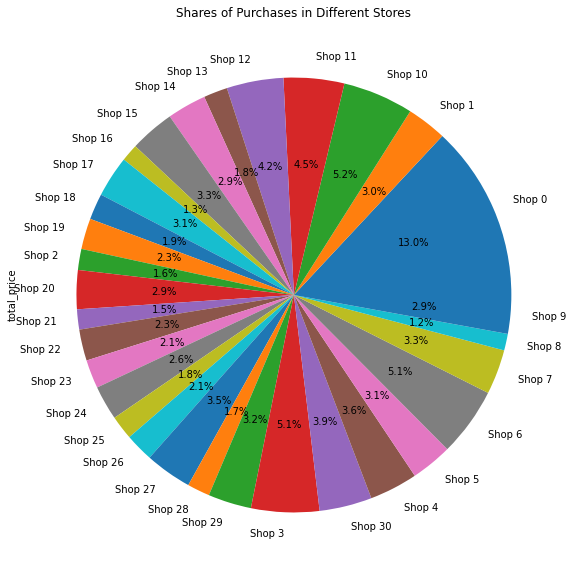

In [30]:
shop_store_purchases = shop.groupby('shopid').sum()['total_price']
shop_store_purchases.plot.pie(autopct='%.1f%%',figsize=(10,10))
plt.title('Shares of Purchases in Different Stores')
plt.show()

Some stores are doing much better than others, shop0 is probably the 'mother' branch with the rest lagging behind.

In [31]:
shop_store_sales = shop.groupby('shopid').sum()['total_price']
shop_store_sales.sort_values(ascending=False)

shopid
Shop 0     1953.11
Shop 10     785.83
Shop 6      764.47
Shop 3      757.37
Shop 11     673.84
Shop 12     631.65
Shop 30     584.77
Shop 4      536.83
Shop 27     520.78
Shop 15     499.33
Shop 7      498.87
Shop 29     482.15
Shop 5      460.72
Shop 17     459.41
Shop 1      444.40
Shop 14     435.41
Shop 20     432.43
Shop 9      429.04
Shop 24     382.51
Shop 22     347.28
Shop 19     342.97
Shop 23     318.08
Shop 26     316.05
Shop 18     290.44
Shop 25     267.49
Shop 13     265.85
Shop 28     251.60
Shop 2      233.53
Shop 21     224.44
Shop 16     193.55
Shop 8      184.74
Name: total_price, dtype: float64

'revenue' from each shop

In [32]:
shop_store_customer_sales = shop.groupby(['shopid', 'customerid']).sum().groupby('shopid').mean()['total_price']
shop_store_customer_sales.sort_values(ascending=False)

shopid
Shop 0     75.119615
Shop 6     50.964667
Shop 12    42.110000
Shop 10    41.359474
Shop 11    33.692000
Shop 3     29.129615
Shop 27    28.932222
Shop 17    28.713125
Shop 4     26.841500
Shop 30    25.424783
Shop 29    24.107500
Shop 9     23.835556
Shop 23    21.205333
Shop 5     20.941818
Shop 15    20.805417
Shop 7     19.954800
Shop 2     19.460833
Shop 20    18.017917
Shop 25    16.718125
Shop 1     16.459259
Shop 16    16.129167
Shop 21    16.031429
Shop 26    15.802500
Shop 13    15.638235
Shop 19    15.589545
Shop 24    15.300400
Shop 18    14.522000
Shop 14    14.513667
Shop 22    13.891200
Shop 28    11.436364
Shop 8      9.723158
Name: total_price, dtype: float64

mean sales per costumer.

In [33]:
shop_store_daily_sales = shop.groupby(['shopid', shop.purchasedate]).sum().groupby('shopid').mean()['total_price']
shop_store_daily_sales.sort_values(ascending=False)

shopid
Shop 6     50.964667
Shop 12    42.110000
Shop 10    41.359474
Shop 11    33.692000
Shop 3     29.129615
Shop 17    28.713125
Shop 27    27.409474
Shop 4     25.563333
Shop 30    24.365417
Shop 29    24.107500
Shop 9     22.581053
Shop 23    21.205333
Shop 5     20.941818
Shop 15    20.805417
Shop 7     19.954800
Shop 2     19.460833
Shop 20    17.297200
Shop 25    16.718125
Shop 1     16.459259
Shop 0     16.412689
Shop 16    16.129167
Shop 21    16.031429
Shop 26    15.802500
Shop 13    15.638235
Shop 24    15.300400
Shop 19    14.911739
Shop 14    14.513667
Shop 22    13.891200
Shop 18    13.830476
Shop 28    11.436364
Shop 8      9.723158
Name: total_price, dtype: float64

daily sales are suprising with shop0 going way down the line, could be that some store were closed for longer than others or perhaps not that many items.

The difference in mean sales between loyalty program members and non-members is statistically significant.
or
The difference in mean sales between loyalty program members and non-members is not statistically significant.

In [34]:
loyalty_sales = shop[shop['loyalty_program'] == 1].groupby('customerid').sum()['total_price']
loyalty_mean = loyalty_sales.mean()

non_loyalty_sales = shop[shop['loyalty_program'] == 0].groupby('customerid').sum()['total_price']
non_loyalty_mean = non_loyalty_sales.mean()

t, p = stats.ttest_ind(loyalty_sales, non_loyalty_sales, equal_var=False)

if p < 0.05:
    print('The difference in mean sales between loyalty program members and non-members is statistically significant.')
else:
    print('The difference in mean sales between loyalty program members and non-members is not statistically significant.')


The difference in mean sales between loyalty program members and non-members is not statistically significant.


as it apear there isnt much of a diffrence between the 2 groups.

In [35]:
shop.columns

Index(['purchasedate', 'purchaseid', 'item_id', 'quantity', 'customerid',
       'loyalty_program', 'shopid', 'price_per_one', 'loyalty_duration',
       'total_price'],
      dtype='object')

In [36]:
customer_purchase_counts = shop.groupby('customerid')['purchasedate'].nunique()
multiple_purchase_customers = customer_purchase_counts[customer_purchase_counts > 1]
multiple_purchase_customers

customerid
18038.0     2
18112.0     2
18150.0     2
18203.0     2
18218.0     2
           ..
23599.0     2
23734.0     3
23795.0     2
23924.0     2
           94
Name: purchasedate, Length: 78, dtype: int64

In [37]:
max_purchase = shop.groupby('customerid')['total_price'].max()
max_purchase.name = 'max_purchase'
shop = shop.merge(max_purchase, on='customerid')
shop

,purchasedate,purchaseid,item_id,quantity,customerid,loyalty_program,shopid,price_per_one,loyalty_duration,total_price,max_purchase
0,2016-12-14 12:38:00,538817,22834,287,21870.0,0,Shop 11,0.85,4.0,243.95,243.95
1,2017-01-07 12:35:00,540459,22971,35,21870.0,0,Shop 14,2.10,0.0,73.50,243.95
2,2017-01-07 12:35:00,540459,22729,11,21870.0,0,Shop 14,3.75,8.0,41.25,243.95
3,2016-12-17 10:54:00,539338,22536,191,23083.0,1,Shop 3,0.36,62.0,68.76,68.76
4,2017-01-05 10:39:00,540122,22609,179,19373.0,0,Shop 14,0.21,0.0,37.59,116.25
...,...,...,...,...,...,...,...,...,...,...,...
978,2016-12-14 14:02:00,538860,22631,1,23436.0,1,Shop 19,1.65,0.0,1.65,2.55
979,2017-02-20 10:56:00,544445,22720,1,22425.0,1,Shop 24,4.25,0.0,4.25,4.25
980,2017-02-03 12:27:00,543107,22795,1,19479.0,0,Shop 14,5.95,77.0,5.95,5.95
981,2017-02-13 11:36:00,543800,22551,1,22961.0,1,Shop 5,1.45,76.0,1.45,1.45


some of the heavy shopers arent even in the loyalty program (its hard to recommend or disrecommend for I don't know what is the benefits of it, maybe its useless)

training a model to determine what can be the max purchase before leaving

In [38]:
x = shop.drop(['max_purchase', 'purchasedate','item_id','purchaseid','customerid','shopid'], axis=1)
y = shop['max_purchase']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12345)

In [39]:
print(x_train.info())
print(x_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786 entries, 35 to 482
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   quantity          786 non-null    int64  
 1   loyalty_program   786 non-null    int64  
 2   price_per_one     786 non-null    float64
 3   loyalty_duration  786 non-null    float64
 4   total_price       786 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 36.8 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 756 to 569
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   quantity          197 non-null    int64  
 1   loyalty_program   197 non-null    int64  
 2   price_per_one     197 non-null    float64
 3   loyalty_duration  197 non-null    float64
 4   total_price       197 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 9.2 KB
None


In [40]:
scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)
x_test_st = scaler.transform(x_test)

In [41]:
model = LinearRegression(normalize=True)
model.fit(x_train, y_train)

LinearRegression(normalize=True)

In [42]:
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error:', mae)

Mean absolute error: 31.421926290265024


### 3. Understand what is the 'comfort zone' for customers in the loyalty program and come up with strong marker that 'price per one' and 'quantity' can increase while the costumer is in the 'loyalty program'' with no intention to leave.

In [43]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
km = KMeans(n_clusters = 5)
labels = km.fit_predict(x_scaler)
x['cluster'] = labels
x.groupby('cluster').mean()

,quantity,loyalty_program,price_per_one,loyalty_duration,total_price
cluster,,,,,
0,8.156398,0.000000,1.438246,2.492891,9.589716
1,7.311111,1.000000,1.732533,14.600000,9.788978
2,2.777778,0.171717,6.475960,16.313131,16.758485
3,86.477273,0.295455,1.734318,18.613636,115.016591
4,8.725389,0.051813,1.598860,60.528497,10.361347


diving into 5 groups shows me that while group will all members of the loyalty program arent necceseraly buying the most in terms of volume and price. the group full of non loyalties have many in common except for the duration of the loyalty (less frequant buyers?)

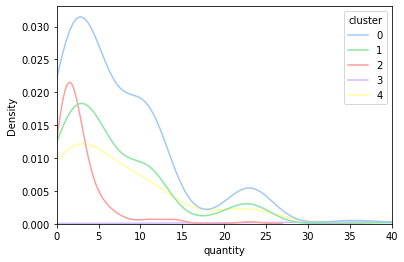

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


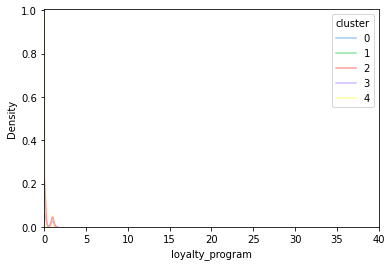

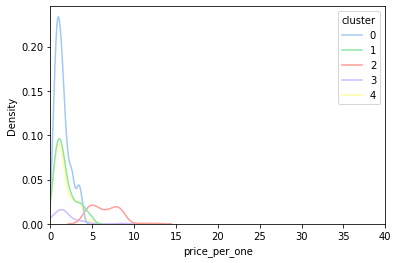

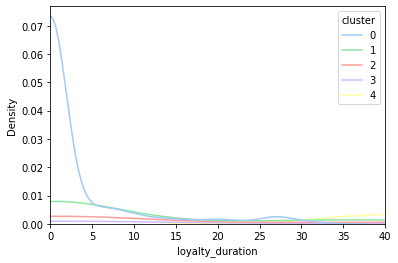

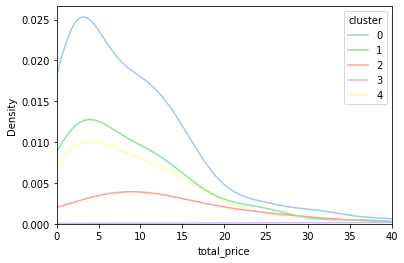

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


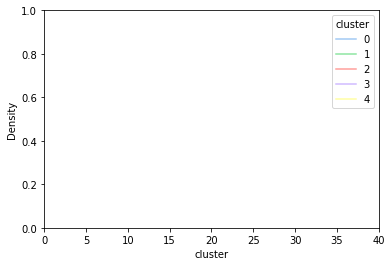

In [44]:
for clu in x:
    sn.kdeplot(
    data=x,
    x=clu,hue='cluster',
    palette=['#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff', '#fffea3'],legend=True)
    plt.xlim(0, 40)
    plt.show()

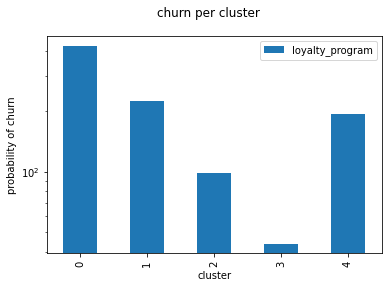

In [45]:
x.groupby(['cluster'])['loyalty_program'].count().plot(kind='bar',legend=True)
plt.suptitle('churn per cluster')
plt.xlabel('cluster')
plt.ylabel('probability of churn')
plt.yscale('log')
plt.show()

2 is rocking the table with the least chance of leavning even though there arent alot of people buying (love the products but not the loyalty program)

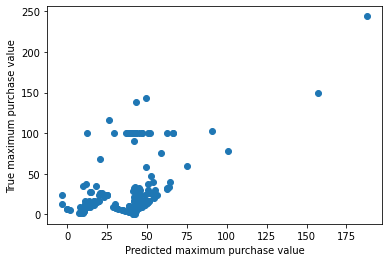

In [46]:
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted maximum purchase value')
plt.ylabel('True maximum purchase value')
plt.show()

it seems the that true maximum purchase size is above what i have predicted

In [47]:
shop['loyalty_duration'] = shop['loyalty_duration'].astype(int)
shop.loyalty_duration.unique()

array([ 4,  0,  8, 62, 41, 68,  3,  7, 80, 37, 71, 77,  2, 66, 32, 52, 64,
       67, 13, 84, 57, 21, 49, 48, 60, 63, 73, 38, 11,  5, 43, 26, 74,  6,
       31, 14, 39, 72, 81, 28, 69, 42, 33, 27, 55, 86, 70, 44, 85, 76, 88,
       12, 56, 10, 61, 78, 35, 18, 40, 30, 58, 65, 20, 59, 45, 24, 15, 75,
       83, 51, 89, 34,  1, 79, 17,  9, 50, 82, 36, 46, 22, 53, 19, 47, 54,
       25, 29, 16])

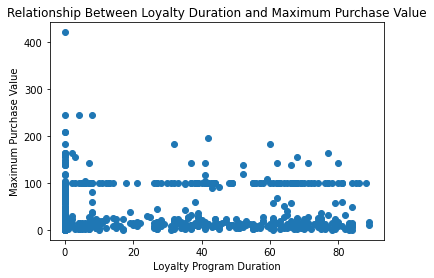

In [48]:
plt.scatter(shop['loyalty_duration'], shop['max_purchase'])
plt.xlabel('Loyalty Program Duration')
plt.ylabel('Maximum Purchase Value')
plt.title('Relationship Between Loyalty Duration and Maximum Purchase Value')
plt.show()

I don't find a visuale relationship between the lonnger a person is at the loyalty program to their maximum purchase size.

### 4. Conclusions and recommendations.
After reviewing the data, visualizing it and understand it, there is no real reason to be in the loyalty program. The reason for it could be high entrance fee or maybe not enough insentives in order to make people come more often or buy more items\ more expensive ones. I advice to update the loyalty program to offer bundles of items or maybe events in order to bring more customers in week hours (such as happy hour at bars nd restaurants.

In [49]:
shop

,purchasedate,purchaseid,item_id,quantity,customerid,loyalty_program,shopid,price_per_one,loyalty_duration,total_price,max_purchase
0,2016-12-14 12:38:00,538817,22834,287,21870.0,0,Shop 11,0.85,4,243.95,243.95
1,2017-01-07 12:35:00,540459,22971,35,21870.0,0,Shop 14,2.10,0,73.50,243.95
2,2017-01-07 12:35:00,540459,22729,11,21870.0,0,Shop 14,3.75,8,41.25,243.95
3,2016-12-17 10:54:00,539338,22536,191,23083.0,1,Shop 3,0.36,62,68.76,68.76
4,2017-01-05 10:39:00,540122,22609,179,19373.0,0,Shop 14,0.21,0,37.59,116.25
...,...,...,...,...,...,...,...,...,...,...,...
978,2016-12-14 14:02:00,538860,22631,1,23436.0,1,Shop 19,1.65,0,1.65,2.55
979,2017-02-20 10:56:00,544445,22720,1,22425.0,1,Shop 24,4.25,0,4.25,4.25
980,2017-02-03 12:27:00,543107,22795,1,19479.0,0,Shop 14,5.95,77,5.95,5.95
981,2017-02-13 11:36:00,543800,22551,1,22961.0,1,Shop 5,1.45,76,1.45,1.45


In [50]:
shop.to_excel('shopxl.xlsx', sheet_name='Sheet1')

# Thank you for the fast replies, the documentation was in a hard to find place after the first fix, moved it to the top.


<hr>
<b>Anton's comments:</b> Hi Liav! Thanks for sending in the project. Good job! The project looks good to me, let's check the main artifacts for the final project:
<ul>
    <li><b>Documentation:</b> Not provided, please provide 3-5 links you used during the project and why</li>
    <li><b>Dashboard:</b> Not provided</li>
    <li><b>Presentation:</b> This doesn't look like a ready presentation, but rather some random graph screenshots. Could you rework it please?</li>
</ul>
Overall - good job! Waiting for the fixes